In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df= pd.read_fwf('spice.din.txt')

In [2]:
df.columns


Index(['type_address'], dtype='object')

In [3]:
split_columns=df['type_address'].str.split(" ",n=1,expand=True)
split_columns=split_columns.rename(columns={0:'type',1:'address'})

In [4]:
split_columns['address']=split_columns['address'].apply(int,base=16)

In [5]:
split_columns

,type,address
0,2,4242548
1,0,2147400392
2,2,4242552
3,2,4242556
4,0,268500976
...,...,...
999996,0,2147400040
999997,2,4226404
999998,2,4226408
999999,2,4226412


In [6]:
sorted_columns=split_columns.sort_values('address',ascending=True)
sorted_columns

,type,address
237199,2,4195404
237200,2,4195408
237202,2,4195412
237203,2,4195416
237204,2,4195420
...,...,...
237188,0,2147400436
703497,0,2147400436
237397,1,2147400436
237214,1,2147400540


In [7]:
minimum=sorted_columns['address'].min()
maximum=sorted_columns['address'].max()
address=sorted_columns['address']
address

237199       4195404
237200       4195408
237202       4195412
237203       4195416
237204       4195420
             ...    
237188    2147400436
703497    2147400436
237397    2147400436
237214    2147400540
237211    2147400540
Name: address, Length: 1000001, dtype: int64

(4195404.0, 2147400540.0)

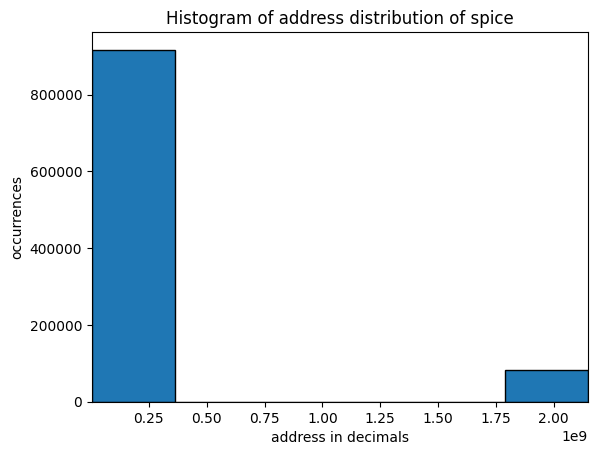

In [8]:

plt.hist(address, bins=6, edgecolor='black')
plt.xlabel("address in decimals")
plt.ylabel("occurrences")
plt.title('Histogram of address distribution of spice')
plt.xlim(minimum,maximum)